In [1]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

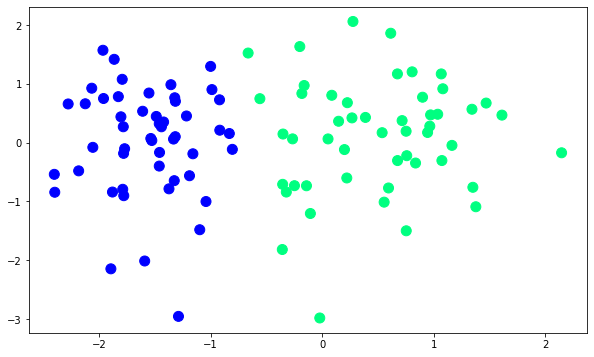

In [2]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [3]:
def perceptron(X,y):
    X = np.insert(X, 0, 1, axis =1) # insert new X0 column in our array before col 0 and it's value is 1
    weight = np.ones(X.shape[1]) # for creating weigth matrix as shape X and its all values as 1
    lr = 0.1
    for i in range(1000):
        j = np.random.randint(0, 100)
        y_hat = step(np.dot(X[j],weight)) # step fun return 1 of val is> 0 else 1
        weight = weight + lr*(y[j] - y_hat)*X[j] # changing the weights according to the requirements
    return weight[0], weight[1:] # returning the intercept and co-efficient
    
    

In [4]:
def step(z):
    return 1 if z> 0 else 0

In [5]:
intercept_, coef_ = perceptron(X, y)

In [6]:
print(intercept_,'\n', coef_)

1.0 
 [1.28904313 0.04958939]


In [7]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [8]:
x_input = np.linspace(-3, 3, 100)
y_input = m*x_input + b

(-3.0, 2.0)

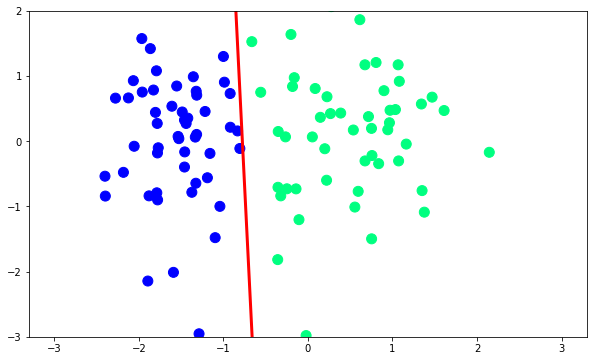

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(x_input, y_input, color = 'red', linewidth = 3)
plt.scatter(X[:, 0],X[:, 1], c= y, cmap='winter', s= 100)
plt.ylim(-3, 2)

In [27]:
 def perceptron(X,y): # used for storing weights at different epoche
    
    m = []
    b = []
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(200):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
        m.append(-(weights[1]/weights[2]))
        b.append(-(weights[0]/weights[2]))
        
    return m,b

In [28]:
m,b = perceptron(X,y)

In [29]:
# used for animation
%matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

<IPython.core.display.Javascript object>


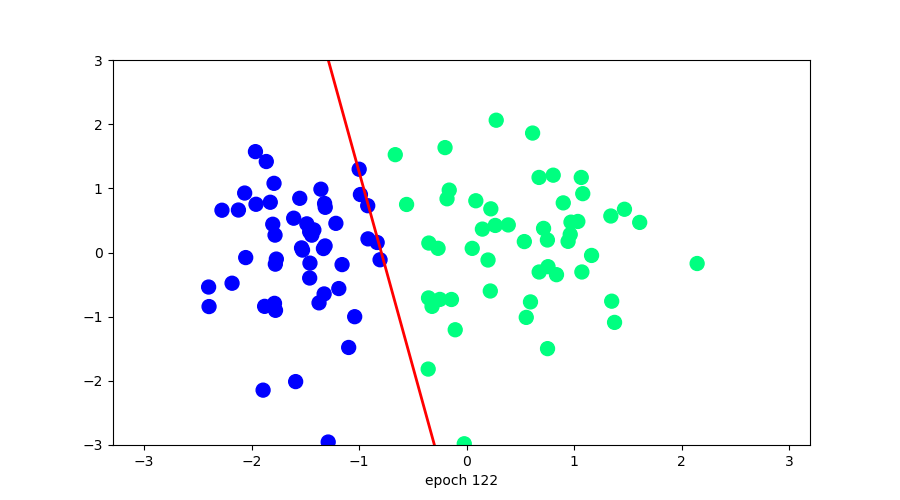

In [31]:
fig, ax = plt.subplots(figsize=(9,5))

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*m[0] +b[0]
ax.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
line, = ax.plot(x_i, x_i*m[0] +b[0] , 'r-', linewidth=2)
plt.ylim(-3,3)
def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*m[i] + b[i])
    ax.set_xlabel(label)
    # return line, ax

anim = FuncAnimation(fig, update, repeat=True, frames=200, interval=100)

In [23]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X,y)

LogisticRegression()

In [24]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])

In [25]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b

<IPython.core.display.Javascript object>


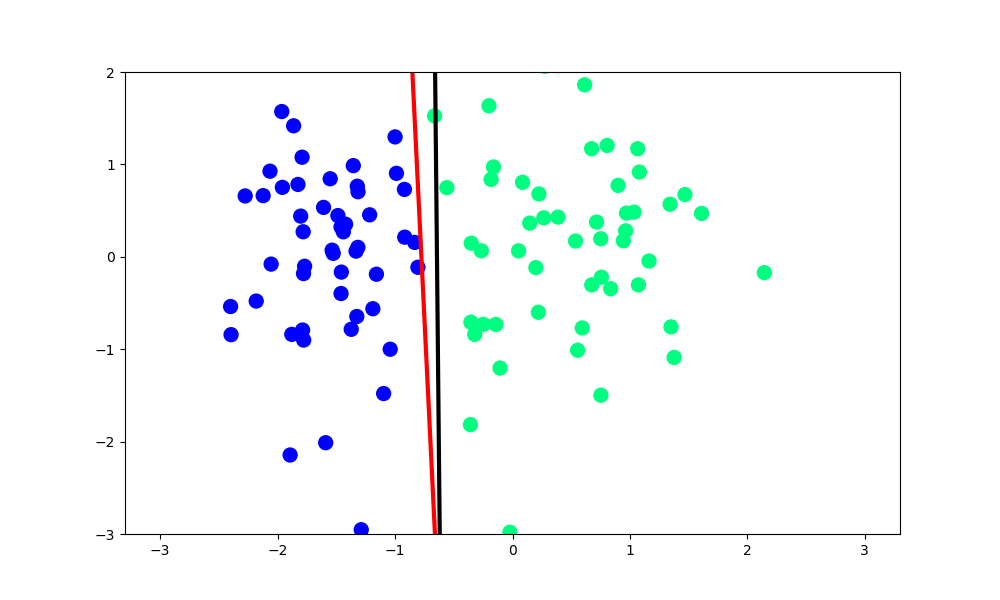

(-3.0, 2.0)

In [26]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)